# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final answers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from [insidearibnb.com](http://insideairbnb.com/get-the-data.html). (September,2019,detailed data)You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 45053**
2. **Number of unique hosts = 26286**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**
 
 We put the data with jupyter notebook in the same directory. The listings csv file has 45053 rows and 106 columns.
 There are 45053 unique listings and 26286 unique hosts in LA dataset.

In [1]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)
import pandas as pd

df_la = pd.read_csv('./listings.csv.gz',compression='gzip')


duplicates_first_all = df_la.duplicated(keep = "first")
print(df_la.loc[duplicates_first_all == False,:].shape)

duplicates_first_host = df_la.host_id.duplicated(keep = "first")
print(df_la.loc[duplicates_first_host == False,:].shape)

C:\Users\WenLungHsu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(45053, 106)
(26286, 106)


### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

The mean of the number of listings per hos is 1.713954, median is 1, standard deviation is 2.999183, minimus 1, maximum 172.

In [10]:
# You need to provide the code to answer the previous quesiton
import numpy as np
df_la.loc[duplicates_first_host == False,"calculated_host_listings_count"].agg([np.mean, np.std, np.min, np.max])


mean      1.713954
std       2.999183
amin      1.000000
amax    172.000000
Name: calculated_host_listings_count, dtype: float64

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

The super host has mean 1.824264, standard deviation 3.177892, while non-super host has mean 1.671021, standard deviation 2.926276.
Super host indeed has more listing on average.


In [11]:
# You need to provide the code to answer the previous quesiton
import numpy as np
#for super host
df_la.loc[duplicates_first_host == False,:].loc[df_la.host_is_superhost == "t", :]["calculated_host_listings_count"].agg([np.mean,np.std])

mean    1.824264
std     3.177892
Name: calculated_host_listings_count, dtype: float64

In [12]:
#for non-super host
df_la.loc[duplicates_first_host == False,:].loc[df_la.host_is_superhost == "f", :]["calculated_host_listings_count"].agg([np.mean,np.std])

mean    1.671021
std     2.926276
Name: calculated_host_listings_count, dtype: float64

### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

#There are 22 unique types of host verifications, including 'email ', 'phone', 'reviews', 'jumio', 'government_id','facebook', 'kba', 'work_email', 'offline_government_id', 'selfie', 'identity_manual', 'google', 'manual_online', 'manual_offline', 'sent_id', '', 'photographer', 'zhima_selfie', 'None', 'weibo', 'sesame' and'sesame_offline'.


In [14]:
# You need to provide the code to answer the previous quesiton
verifications_list = []
for line in df_la["host_verifications"]:
    v = line.strip("][").replace(" ","").split(",")
    for j in v:
        if j not in verifications_list:
            verifications_list.append(j)

print(verifications_list)

["'email'", "'phone'", "'facebook'", "'reviews'", "'kba'", "'jumio'", "'government_id'", "'offline_government_id'", "'selfie'", "'identity_manual'", "'work_email'", "'manual_online'", "'manual_offline'", "'google'", '', "'sent_id'", 'None', "'sesame'", "'sesame_offline'", "'photographer'", "'zhima_selfie'", "'weibo'"]


### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

#The five most pupluar verification is email, phone, reviews, jumio and government_id.
#There are 93.84% of hosts verifying email, 99.68% verifying phone, 68.85% verifying reviews,43.34% verifying jumio and 58.77% verifying government_id.


In [15]:
# You need to provide the code to answer the previous quesiton
verifications_count = {}
for line in df_la.loc[duplicates_first_host == False,:]["host_verifications"]:
    v = line.strip("][").replace(" ","").split(",")
    for j in v:
        if j in verifications_count:
            verifications_count[j] += 1
        else:
            verifications_count[j] = 1

for i in sorted(verifications_count.items(), key=lambda x: x[1] , reverse= True)[:5]:
    print (i,'{:.1%}'.format(i[1]/26286))


("'phone'", 26201) 99.7%
("'email'", 24666) 93.8%
("'reviews'", 18099) 68.9%
("'government_id'", 15448) 58.8%
("'jumio'", 11392) 43.3%


### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

#The mean of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 is 254.778227 and standard deviation is 684.755050.


In [16]:
# You need to provide the code to answer the previous quesiton
import pandas as pd
df_la_calendar = pd.read_csv('./calendar.csv.gz',compression='gzip')

In [86]:
df_la_calendar_no_nan=df_la_calendar.dropna(axis=0).copy()

In [18]:
df_la_intime = df_la_calendar_no_nan.loc[df_la_calendar_no_nan.available == "t" ,:]\
                                    .loc[(pd.to_datetime(df_la_calendar_no_nan["date"])>="2020-01-01")\
                                        &(pd.to_datetime(df_la_calendar_no_nan["date"])<="2020-03-01"),:].copy()

In [19]:
df_la_intime["price_fixed"] = df_la_intime.price.apply(lambda x : float(str(x).strip("$").replace(",","")))

In [20]:
import numpy as np

df_avgprice = df_la_intime.groupby(by=["listing_id"])["price_fixed"].agg([np.mean])
df_avgprice

,mean
listing_id,
2708,52.393443
2732,140.000000
5728,71.833333
5729,76.833333
5843,129.107143
...,...
38603247,60.000000
38603385,69.491803
38603626,90.032787


In [21]:
df_avgprice["mean"].agg([np.mean,np.std])

mean    254.778227
std     684.755050
Name: mean, dtype: float64

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

The most popular ten words in the three period are showed as the table below

In [24]:
# You need to provide the code to answer the previous quesiton
df_la_reviews = pd.read_csv('./reviews.csv.gz',compression='gzip')

In [116]:
df_la_reviews_in_Jan_2016 = df_la_reviews.loc[(pd.to_datetime(df_la_reviews["date"])>="2016-01-01")\
                                             &(pd.to_datetime(df_la_reviews["date"])<="2016-01-31"),:].copy()

In [125]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

all_words_in_Jan_2016 = {}
for line in df_la_reviews_in_Jan_2016.comments:
    word_tokens = word_tokenize(line)
    word_tokens = [c.lower() for c in word_tokens]
    filtered_sentence = [w for w in word_tokens if not w in stop_words and not w in "'s"]
    filtered_sentence = [''.join(c for c in s if c not in string.punctuation) for s in filtered_sentence]
    filtered_sentence = [s for s in filtered_sentence if s]
    for word in filtered_sentence:
        if word in all_words_in_Jan_2016:
            all_words_in_Jan_2016[word] += 1
        else:
            all_words_in_Jan_2016[word] = 1

In [126]:
sorted(all_words_in_Jan_2016.items(), key=lambda x: x[1] , reverse= True)[:10]

[('great', 5437),
 ('stay', 4708),
 ('place', 4331),
 ('clean', 2760),
 ('location', 2758),
 ('house', 2688),
 ('us', 2649),
 ('would', 2505),
 ('nice', 2432),
 ('host', 2378)]

In [138]:
df_la_reviews_in_M_2017 = df_la_reviews.loc[(pd.to_datetime(df_la_reviews["date"])>="2017-03-01")\
                                           &(pd.to_datetime(df_la_reviews["date"])<="2017-03-31"),:].copy()

In [139]:
df_la_reviews_in_M_2017_2 = df_la_reviews_in_M_2017.loc[df_la_reviews_in_M_2017.comments.isna() != 1,:]

In [140]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

all_words_in_M_2017 = {}
for line in df_la_reviews_in_M_2017_2.comments:
    word_tokens = word_tokenize(line)
    word_tokens = [c.lower() for c in word_tokens]
    filtered_sentence = [w for w in word_tokens if not w in stop_words and not w in "'s"]
    filtered_sentence = [''.join(c for c in s if c not in string.punctuation) for s in filtered_sentence]
    filtered_sentence = [s for s in filtered_sentence if s]
    for word in filtered_sentence:
        if word in all_words_in_M_2017:
            all_words_in_M_2017[word] += 1
        else:
            all_words_in_M_2017[word] = 1

sorted(all_words_in_M_2017.items(), key=lambda x: x[1] , reverse= True)[:10]

[('great', 12288),
 ('place', 11589),
 ('stay', 9524),
 ('location', 5951),
 ('clean', 5505),
 ('would', 4703),
 ('nice', 4580),
 ('host', 4513),
 ('house', 3816),
 ('comfortable', 3812)]

In [141]:
df_la_reviews_in_Apr_2018 = df_la_reviews.loc[(pd.to_datetime(df_la_reviews["date"])>="2018-04-01")\
                                             &(pd.to_datetime(df_la_reviews["date"])<="2018-04-30"),:].copy()

In [143]:
df_la_reviews_in_Apr_2018_2 = df_la_reviews_in_Apr_2018.loc[df_la_reviews_in_Apr_2018.comments.isna() != 1,:]

In [147]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

all_words_in_Apr_2018 = {}
for line in df_la_reviews_in_Apr_2018_2.comments:
    word_tokens = word_tokenize(line)
    word_tokens = [c.lower() for c in word_tokens]
    filtered_sentence = [w for w in word_tokens if not w in stop_words and not w in "'s"]
    filtered_sentence = [''.join(c for c in s if c not in string.punctuation and not c.isalpha() == 0) for s in filtered_sentence]
    filtered_sentence = [s for s in filtered_sentence if s]
    for word in filtered_sentence:
        if word in all_words_in_Apr_2018:
            all_words_in_Apr_2018[word] += 1
        else:
            all_words_in_Apr_2018[word] = 1

sorted(all_words_in_Apr_2018.items(), key=lambda x: x[1] , reverse= True)[:10]

[('great', 18966),
 ('place', 18755),
 ('stay', 14831),
 ('location', 10124),
 ('clean', 9134),
 ('would', 7537),
 ('host', 6920),
 ('nice', 6849),
 ('la', 5651),
 ('house', 5587)]

### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

The top five zipcodes are 90210, 90077, 90265, 90069 and 91436. The price, active listings and number of hosts of those top five zipcodes are showed in the table below

In [38]:
# You need to provide the code to answer the previous quesiton
import pandas as pd
from pandasql import sqldf

df_la_calendar_Jan_2020 = df_la_calendar_no_nan.loc[df_la_calendar_no_nan.available == "t" ,:]\
                                               .loc[(pd.to_datetime(df_la_calendar_no_nan["date"])>="2020-01-01")\
                                                   &(pd.to_datetime(df_la_calendar_no_nan["date"])<="2020-02-01"),:].copy()

df_la_calendar_Jan_2020["price_fixed"] = df_la_calendar_Jan_2020.price.apply(lambda x : float(str(x).strip("$").replace(",","")))
df_calendar_zipcode = sqldf("SELECT A.*, B.zipcode, B.host_id \
                             FROM df_la_calendar_Jan_2020 AS A\
                             LEFT JOIN df_la AS B ON A.listing_id = B.id")

In [40]:
#clean zipcode
import re
df_calendar_zipcode["zipcode_fixed"] = df_calendar_zipcode.zipcode.apply(lambda x : re.sub("[^0-9]", "", str(x)))

In [42]:
df_calendar_zipcode_listavgprice = sqldf("SELECT listing_id, avg(price_fixed) as list_avgp, zipcode_fixed, host_id\
                                          FROM df_calendar_zipcode\
                                          GROUP BY listing_id")

In [46]:
top_5_zipcode = sqldf("SELECT zipcode_fixed, avg(list_avgp) AS avg_price, count(listing_id) AS id_count, count(distinct host_id) AS host_id_count\
                       FROM df_calendar_zipcode_listavgprice\
                       GROUP BY zipcode_fixed\
                       HAVING id_count >= 30\
                       ORDER BY avg_price desc\
                       LIMIT 5")

In [47]:
top_5_zipcode

,zipcode_fixed,avg_price,id_count,host_id_count
0,90210,1926.469725,278,173
1,90077,1832.004457,74,48
2,90265,1547.648483,329,221
3,90069,949.920967,426,306
4,91436,639.542918,40,33


### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

#Question 1, the top five zipcode is 91384, 90265, 90210, 91325 and 90293, which has differences is 22.547185, 20.103059, 10.723267, 9.428009 and 8.973894 respectively. 
#The average weekends price and average weekdays of each zipcode is shown below. 


In [56]:
# You need to provide the code to answer the previous quesiton
#take out data
df_la_calendar_Jan_to_Mar_2020 = df_la_calendar_no_nan.loc[(pd.to_datetime(df_la_calendar_no_nan["date"])>="2020-01-01")\
                                                          &(pd.to_datetime(df_la_calendar_no_nan["date"])<="2020-04-01"),:].copy()
#attach price_fixed
df_la_calendar_Jan_to_Mar_2020["price_fixed"] = df_la_calendar_Jan_to_Mar_2020.price.apply(lambda x : float(str(x).strip("$").replace(",","")))
#attach with zipcode
df_calendar_zipcode_for_Jan_to_Mar_2020 = sqldf("SELECT A.*, B.zipcode \
                                                 FROM df_la_calendar_Jan_to_Mar_2020 AS A\
                                                 LEFT JOIN df_la AS B ON A.listing_id = B.id")

In [57]:
#clean zipcode
import re
df_calendar_zipcode_for_Jan_to_Mar_2020["zipcode_fixed"] = df_calendar_zipcode_for_Jan_to_Mar_2020.zipcode.apply(lambda x : re.sub("[^0-9]", "", str(x)))
#df_calendar_zipcode_for_Jan_to_Mar_2020.head()

In [58]:
#add weekend column
df_calendar_zipcode_for_Jan_to_Mar_2020['Weekend'] = ((pd.DatetimeIndex(df_calendar_zipcode_for_Jan_to_Mar_2020.date).dayofweek) // 5 == 1)

In [87]:
more_30_zipcode =sqldf("Select zipcode_fixed, count(distinct listing_id) AS count_list\
                               From df_calendar_zipcode_for_Jan_to_Mar_2020\
                               GROUP BY zipcode_fixed\
                               HAVING count_list >= 30")

In [61]:
zipcode_week_price = sqldf("Select zipcode_fixed, avg(price_fixed) AS avg_week_price\
                            From df_calendar_zipcode_for_Jan_to_Mar_2020\
                            WHERE Weekend == False\
                            GROUP BY zipcode_fixed")

In [62]:
zipcode_weekend_price = sqldf("Select zipcode_fixed, avg(price_fixed) AS avg_weekend_price\
                               From df_calendar_zipcode_for_Jan_to_Mar_2020\
                               WHERE Weekend == True\
                               GROUP BY zipcode_fixed")

In [88]:
top5_diff = sqldf("Select A.zipcode_fixed, B.avg_week_price, C.avg_weekend_price, ABS(B.avg_week_price - C.avg_weekend_price) AS price_diff\
                   From more_30_zipcode AS A\
                   JOIN zipcode_week_price AS B ON A.zipcode_fixed = B.zipcode_fixed\
                   JOIN zipcode_weekend_price AS C ON A.zipcode_fixed = C.zipcode_fixed\
                   ORDER BY price_diff desc\
                   LIMIT 5")

In [89]:
top5_diff

,zipcode_fixed,avg_week_price,avg_weekend_price,price_diff
0,91384,138.430670,160.977855,22.547185
1,90265,1397.389489,1417.492548,20.103059
2,90210,1620.193908,1630.917175,10.723267
3,91325,220.009608,229.437617,9.428009
4,90293,246.446374,255.420268,8.973894


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**

#Q1: The average and standard deviation of the daily total capacity t Airbnb Los Angeles from 2020-01-01 to 2020-04-01  is 46995.228261 and 4980.641316 respectively.
#Q2: The average and standard deviation of the daily price per bed t Airbnb Los Angeles from 2020-01-01 to 2020-04-01 is 105.600885 and 3.056515 respectively.


In [99]:
df_la_calendar_Jan_to_Mar_2020_2 = df_la_calendar.loc[(pd.to_datetime(df_la_calendar["date"])>="2020-01-01")\
                                                     &(pd.to_datetime(df_la_calendar["date"])<="2020-04-01"),:].copy()

In [100]:
df_calendar_beds_for_Jan_to_Mar_2020_2 = sqldf("SELECT A.*, B.beds \
                                              FROM df_la_calendar_Jan_to_Mar_2020_2 AS A\
                                              LEFT JOIN df_la AS B ON A.listing_id = B.id")

In [103]:
df_total_capacity_2 = df_calendar_beds_for_Jan_to_Mar_2020_2.loc[df_calendar_beds_for_Jan_to_Mar_2020_2.available == "t",:]\
                                                            .groupby(by=["date"])["beds"].sum()

df_total_capacity_2.agg([np.mean, np.std])

mean    46995.228261
std      4980.641316
Name: beds, dtype: float64

In [114]:
df_calendar_beds_for_Jan_to_Mar_2020_3 = df_calendar_beds_for_Jan_to_Mar_2020_2.dropna(axis=0).copy()
df_calendar_beds_for_Jan_to_Mar_2020_3["price_fixed"] = df_calendar_beds_for_Jan_to_Mar_2020_3.price.apply(lambda x : float(str(x).strip("$").replace(",","")))
#df_calendar_beds_for_Jan_to_Mar_2020_3
df_price_per_bed = df_calendar_beds_for_Jan_to_Mar_2020_3.loc[df_calendar_beds_for_Jan_to_Mar_2020_3.beds != 0].groupby(by=["date"])["price_fixed","beds"].sum()
df_price_per_bed["price_per_bed"] = df_price_per_bed["price_fixed"] /  df_price_per_bed["beds"]
df_price_per_bed["price_per_bed"].agg([np.mean, np.std])

mean    105.600885
std       3.056515
Name: price_per_bed, dtype: float64

## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:** In listing dataframe, which factors are highly related to the review_score_rating?

**Question 2:** How's the lense of description affects the review_score_rating?

**Question 3:** How's response rate affects the review_score_rating?

**Question 4:** How's the lists that host hold affects the review_score_rating?

**Question 5:** How's the amount of amenities affects the review_score_rating?


Started
Training data: dataframe: (45053, 97),target: 45053
Will train XGB for 100 rounds, RandomSeed: 12357
[0]	train-rmse:1.01406	eval-rmse:1.01163
[1]	train-rmse:0.919948	eval-rmse:0.92018
[2]	train-rmse:0.835635	eval-rmse:0.839013
[3]	train-rmse:0.760509	eval-rmse:0.767057
[4]	train-rmse:0.693333	eval-rmse:0.703087
[5]	train-rmse:0.633473	eval-rmse:0.646861
[6]	train-rmse:0.580093	eval-rmse:0.597001
[7]	train-rmse:0.532848	eval-rmse:0.553634
[8]	train-rmse:0.490998	eval-rmse:0.516311
[9]	train-rmse:0.453977	eval-rmse:0.483852
[10]	train-rmse:0.421138	eval-rmse:0.455309
[11]	train-rmse:0.392379	eval-rmse:0.431322
[12]	train-rmse:0.36679	eval-rmse:0.410545
[13]	train-rmse:0.343997	eval-rmse:0.393033
[14]	train-rmse:0.324116	eval-rmse:0.378401
[15]	train-rmse:0.306969	eval-rmse:0.366204
[16]	train-rmse:0.291698	eval-rmse:0.355739
[17]	train-rmse:0.278461	eval-rmse:0.346894
[18]	train-rmse:0.266877	eval-rmse:0.339827
[19]	train-rmse:0.257474	eval-rmse:0.333988
[20]	train-rmse:0.248838	

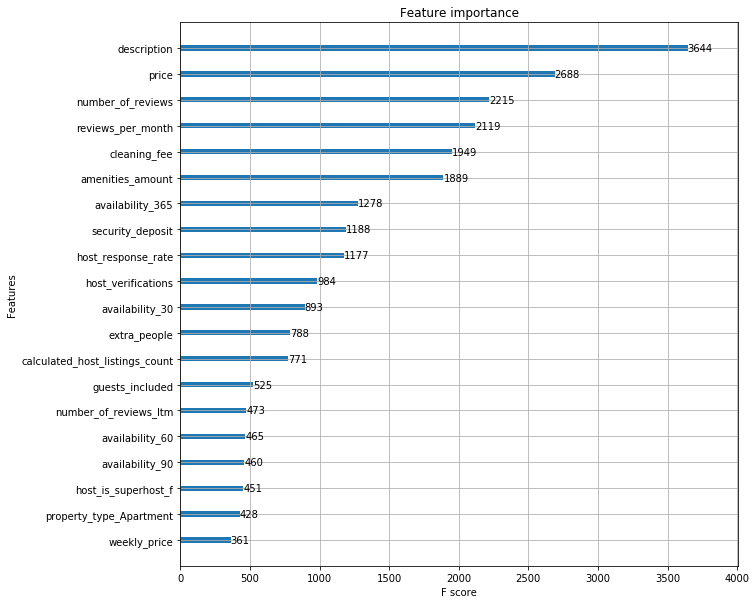

In [60]:
# Your code to answer Question 1
df_listings = df_la.copy()
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.DataFrame()
df["description"] = df_listings["description"].apply(lambda x : len(str(x)) if str(x) != "nan" else 0)
df = pd.concat([df, pd.get_dummies(df_listings['host_response_time'], prefix = 'host_response_time')], axis = 1)
df['host_response_rate'] = df_listings['host_response_rate'].fillna('0').apply(lambda x: int(x.strip("%")))
df = pd.concat([df, pd.get_dummies(df_listings['host_is_superhost'], prefix = 'host_is_superhost')], axis = 1)
df = pd.concat([df, pd.get_dummies(df_listings['property_type'], prefix = 'property_type')], axis = 1)
df = pd.concat([df, pd.get_dummies(df_listings['room_type'], prefix = 'room_type')], axis = 1)
df = pd.concat([df, pd.get_dummies(df_listings['bed_type'], prefix = 'bed_type')], axis = 1)
df['square_feet'] = df_listings['square_feet'].fillna(0)
df['price'] = df_listings['price'].fillna("0").apply(lambda x: float(str(x).strip('$').replace(",","")))
df['weekly_price'] = df_listings['weekly_price'].fillna("0").apply(lambda x: float(str(x).strip('$').replace(",","")))
df['monthly_price'] = df_listings['monthly_price'].fillna("0").apply(lambda x: float(str(x).strip('$').replace(",","")))

df['cleaning_fee'] = df_listings['cleaning_fee'].apply(lambda x:float(str(x).strip('$').replace(',','')))
df['guests_included']=df_listings['guests_included']
df['extra_people'] = df_listings['extra_people'].apply(lambda x:float(str(x).strip('$').replace(',','')))
df = pd.concat([df, pd.get_dummies(df_listings['has_availability'], prefix = 'has_availability')], axis = 1)
df['availability_30'] = df_listings['availability_30']
df['availability_60'] = df_listings['availability_60']
df['availability_90'] = df_listings['availability_90']
df['availability_365'] = df_listings['availability_365']
df['number_of_reviews']= df_listings['number_of_reviews']
df['number_of_reviews_ltm']= df_listings['number_of_reviews_ltm']
df['security_deposit']=df_listings['security_deposit'].apply(lambda x:float(str(x).strip('$').replace(',','')))
df['amenities_amount']=df_listings.amenities.apply(lambda x: x.strip('}{').split(',')).apply(lambda x: len(x))

df["requires_license"] = df_listings["requires_license"].map({"t":1, "f":0})
df['instant_bookable'] = df_listings["instant_bookable"].map({"t":1, "f":0})
df['is_business_travel_ready'] = df_listings["instant_bookable"].map({"t":1, "f":0})
df_listings["host_verifications_fix"] =df_listings["host_verifications"].apply(lambda x : len(x.strip("][").replace(" ","").split(",")))
df["host_verifications"] = df_listings["host_verifications_fix"]
df['require_guest_profile_picture'] = df_listings["requires_license"].map({"t":1, "f":0})
df['require_guest_phone_verification'] = df_listings["require_guest_phone_verification"].map({"t":1, "f":0})
df['calculated_host_listings_count'] = df_listings["calculated_host_listings_count"]
df['calculated_host_listings_count_entire_homes'] = df_listings["calculated_host_listings_count_entire_homes"]
df['calculated_host_listings_count_private_rooms'] = df_listings["calculated_host_listings_count_shared_rooms"]
df['reviews_per_month'] = df_listings["reviews_per_month"].fillna(0)
df = pd.concat([df, pd.get_dummies(df_listings['cancellation_policy'], prefix = 'cancellation_policy')], axis = 1)

y = pd.DataFrame()
y = df_listings['review_scores_rating'].apply(lambda x: 0 if str(x) == "nan" else x )

from scipy.stats import zscore

y = zscore(y)
    
print("Started")
RS = 12357
np.random.seed(RS)
ROUNDS = 100
eta = 0.1
max_depth = 10
params = {}
params['objective'] = 'reg:linear'
params['eval_metric'] = 'rmse'
params['eta'] = eta
params['max_depth'] = max_depth
params['silent'] = 1
params['seed'] = RS
feature_names = list(df.columns.values)

def train_xgb(X, y, params):
    print("Will train XGB for {} rounds, RandomSeed: {}".format(ROUNDS, RS))
    x, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RS)
    
    xg_train = xgb.DMatrix(x, label=y_train)
    xg_val = xgb.DMatrix(X_val, label=y_val)
    
    watchlist  = [(xg_train,'train'), (xg_val,'eval')]
    return xgb.train(params, xg_train, ROUNDS, watchlist)
 
print("Training data: dataframe: {},target: {}".format(df.shape, len(y)))
clr = train_xgb(df,y, params)

print("Features importances...")
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(clr, max_num_features=20, ax=ax)



As we can see in the feature importance chart, some factors like the length of description, number of reviews, host response rate significantly affects the reviews rating scores of an Airbnb listing. Among these factors, we decide to analyze four of them that surprise us the most and may have the greatest business values.

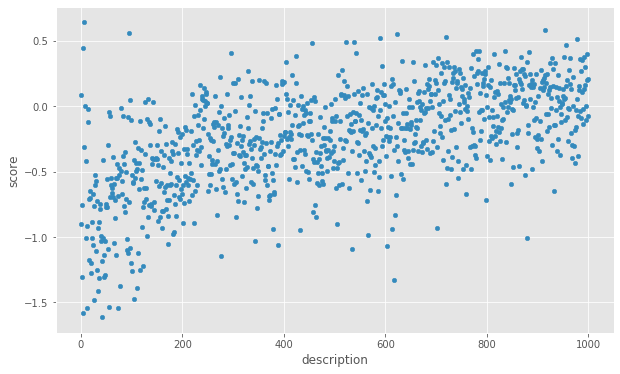

In [72]:
# Your code to answer Question 2
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig,ax0=plt.subplots(figsize=(10,6))
%matplotlib inline
df_0 = pd.DataFrame(df['description'])
df_0["score"] = y
df_1 = pd.DataFrame(df_0.groupby(by="description").apply(lambda x: x['score'].mean()),columns=['score']).reset_index(drop=False)
df_1[["description",'score']].plot(kind="scatter",x="description",y='score',ax=ax0)
ax.grid(True)
fig


From the scatter plot of description and review scores rating, we found out that as the length of the description goes up, which indicates the more detailed introduction of the listing, the review scores will get higher. We strongly recommend that the host should pay more effort into showing that they have a passion to run the lists.

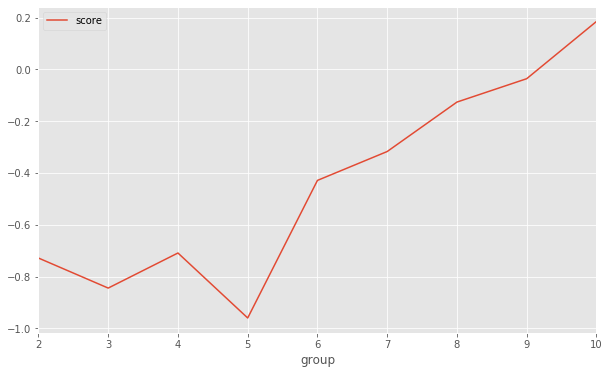

In [73]:
# Your code to answer Question 3
df_response_rate = pd.DataFrame()
df_response_rate['score'] = y
df_response_rate['response_rate'] = df['host_response_rate']
def get_group(x):
    if float(str(x).replace('%',''))<10 and float(str(x).replace('%',''))>0:
        return 1
    elif float(str(x).replace('%',''))<20 and float(str(x).replace('%',''))>=10:
        return 2
    elif float(str(x).replace('%',''))<30 and float(str(x).replace('%',''))>=20:
        return 3
    elif float(str(x).replace('%',''))<40 and float(str(x).replace('%',''))>=30:
        return 4
    elif float(str(x).replace('%',''))<50 and float(str(x).replace('%',''))>=40:
        return 5
    elif float(str(x).replace('%',''))<60 and float(str(x).replace('%',''))>=50:
        return 6
    elif float(str(x).replace('%',''))<70 and float(str(x).replace('%',''))>=60:
        return 7
    elif float(str(x).replace('%',''))<80 and float(str(x).replace('%',''))>=70:
        return 8
    elif float(str(x).replace('%',''))<90 and float(str(x).replace('%',''))>=80:
        return 9
    elif float(str(x).replace('%',''))<=100 and float(str(x).replace('%',''))>=90:
        return 10
df_response_rate.dropna(inplace = True)
df_response_rate['group']= df_response_rate.response_rate.apply(get_group)
df_plot = pd.DataFrame(df_response_rate.groupby(by = 'group').score.mean()).reset_index()
fig,ax0=plt.subplots(figsize=(10,6))
df_plot.plot(kind = 'line', x = 'group', y = 'score', ax = ax0)
ax.grid(True)


We divide the listings into 10 groups based on their hosts' response rate. For example, the first group contains the listings that have host response rates below 10%, the second group contains the listing that have host reponse rates between 10% and 20% and so on. From the chart we can easily see that the review rating scores increase with the hosts' response rate, which indicates that in order to get high review scores, a host should maintain a high response rate. 

According to the plot, we found that the hosts who own about 0 to 25 got the highest score. As the nubmer of list that host process rise,       the avreage review score decreases. This might because that the hosts who have too many lists don't have too much time to take care every        list that they process. Therefore, we recommend that the host should not hold too many lists.


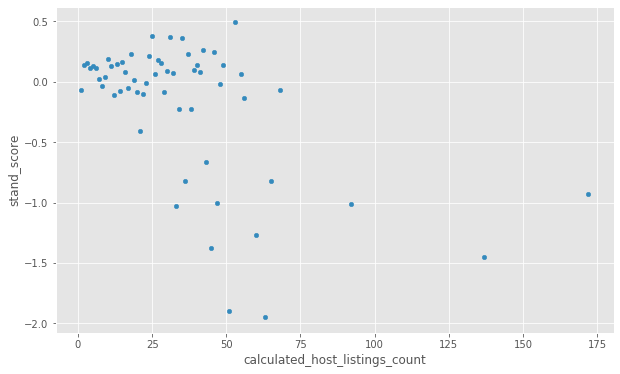

In [76]:
# Your code to answer Question 4
from scipy.stats import zscore
z = zscore(y)

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df_plot = df.copy()
df_plot["stand_score"] = z
df_plot["ori_score"] = y

#df_plot["calculated_host_listings_count"]= df_plot["calculated_host_listings_count"].apply(lambda x: 5 if x>4 else x )
df_plot2 = pd.DataFrame(df_plot.groupby(by = ["calculated_host_listings_count"]).stand_score.mean().reset_index())
#df_plot2



fig,ax0=plt.subplots(figsize=(10,6))
df_plot2[["calculated_host_listings_count","stand_score"]].plot(kind = "scatter", x= "calculated_host_listings_count", y= "stand_score", ax=ax0 )
ax.grid(True)

According to the plot, we found that the hosts who own about 0 to 25 got the highest score. As the nubmer of list that host process rise, the avreage review score decreases. This might because that the hosts who have too many lists don't have too much time to take care every list that they process. Therefore, we recommend that the host should not hold too many lists.

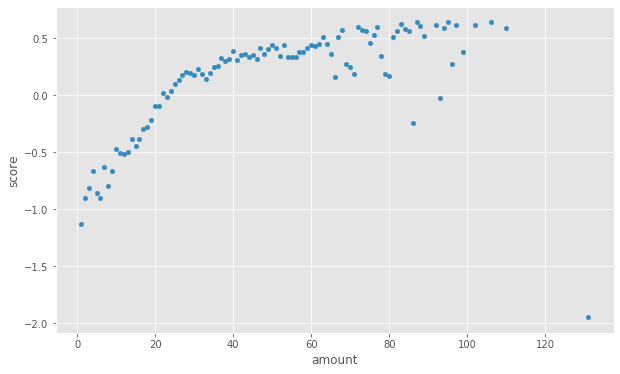

In [69]:
# Your code to answer Question 5 
df_amenities = pd.DataFrame()
df_amenities['amount'] = df['amenities_amount']
df_amenities['score'] = y
amenities_plot = pd.DataFrame(df_amenities.groupby(by= 'amount').score.mean()).reset_index()
fig,ax0=plt.subplots(figsize=(10,6))
amenities_plot.plot(kind = 'scatter', x = 'amount', y = 'score', ax =ax0)
ax.grid(True)


We also found that the amount of amenities provided by the host can also significantly affect the review score. Thus, we would also recommend Airbnb hosts to provide as many amenities as they can.

## Executive Summary
As we all know, review scores are the most important indicator of the experience offered by an Airbnb listing to the customers. Almost every customer would check the review scores of a listing before they book and listings with higher review scores tend to get more exposure than those with lower scores. Thus, it is extremely important for an Airbnb host to improve his listings’ review scores. 

In order to help Airbnb hosts to get higher reviews scores rating, we decide to find the factors that affect the review scores most.  Given this, we consider reviews scores rating as our response variable and select some columns that may have some correlations with the reviews scores rating from our point of view.  We utilize XGBoost ( a Decision-Tree-Based ensemble Machine Learning algorithm method that uses gradient boosting framework) to find out the relationship between Reviews_Scores_Rating and variables.

After analysis, we find out the length of description, hosts’ response rate and the amount of amenities has a positive correlation with reviews score rating while the calculated host listing count is negatively related. So we recommend hosts to make their descriptions as detailed as possible, improve their response rate and increase the amount of amenities and keep their number of listing relatively small to attract more customers.
